In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

# Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [19]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder=LabelEncoder()

In [23]:
df['Target']=encoder.fit_transform(df['Target'])

In [24]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [31]:
# checking for duplicate values
df.duplicated().sum()

403

In [33]:
# remove duplicate
df=df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

0

In [37]:
df.shape

(5169, 2)

 # EDA

In [40]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cdb94374a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

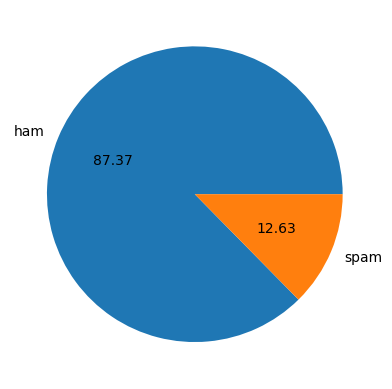

In [44]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [46]:
import nltk

In [50]:
df['num_characters']=df['Text'].apply(len)

In [52]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:

df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [61]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [74]:

df['sentence_count'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [75]:
df.head()

,Target,Text,num_characters,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [78]:
df[['num_characters','num_words','sentence_count']].describe()

,num_characters,num_words,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
#ham
df[df['Target']==0][['num_characters','num_words','sentence_count']].describe()

,num_characters,num_words,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [82]:
#spam
df[df['Target']==1][['num_characters','num_words','sentence_count']].describe()

,num_characters,num_words,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [84]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

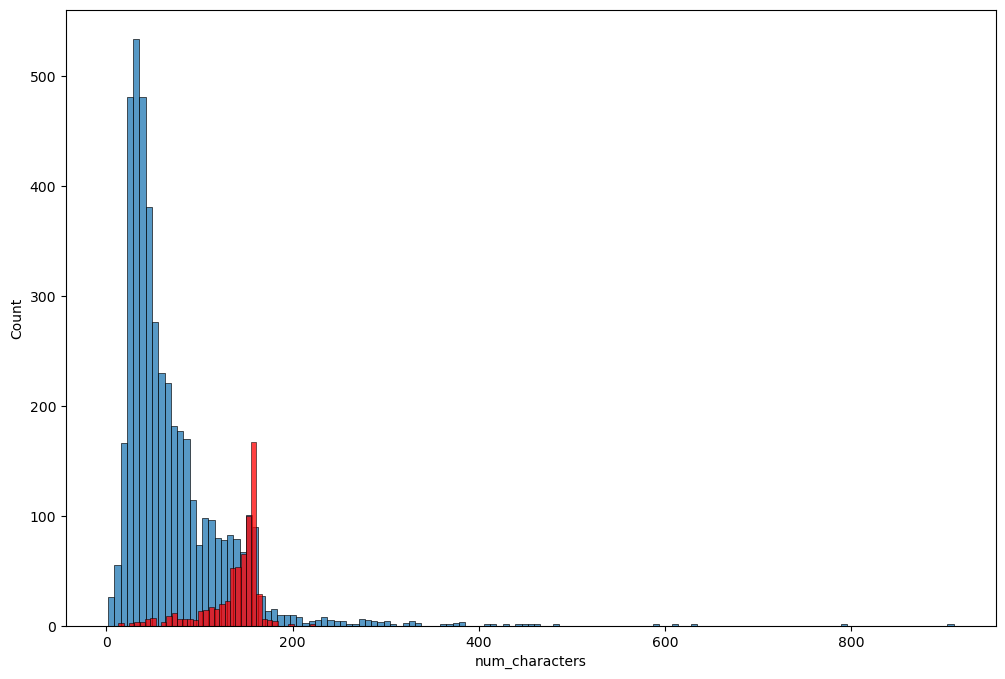

In [85]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

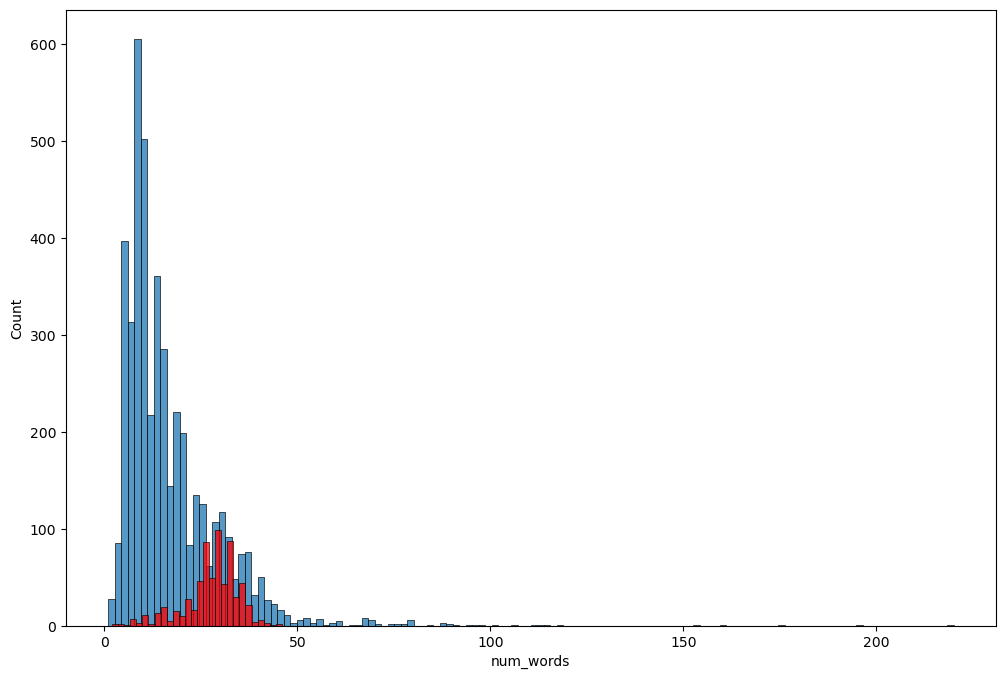

In [87]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='sentence_count', ylabel='Count'>

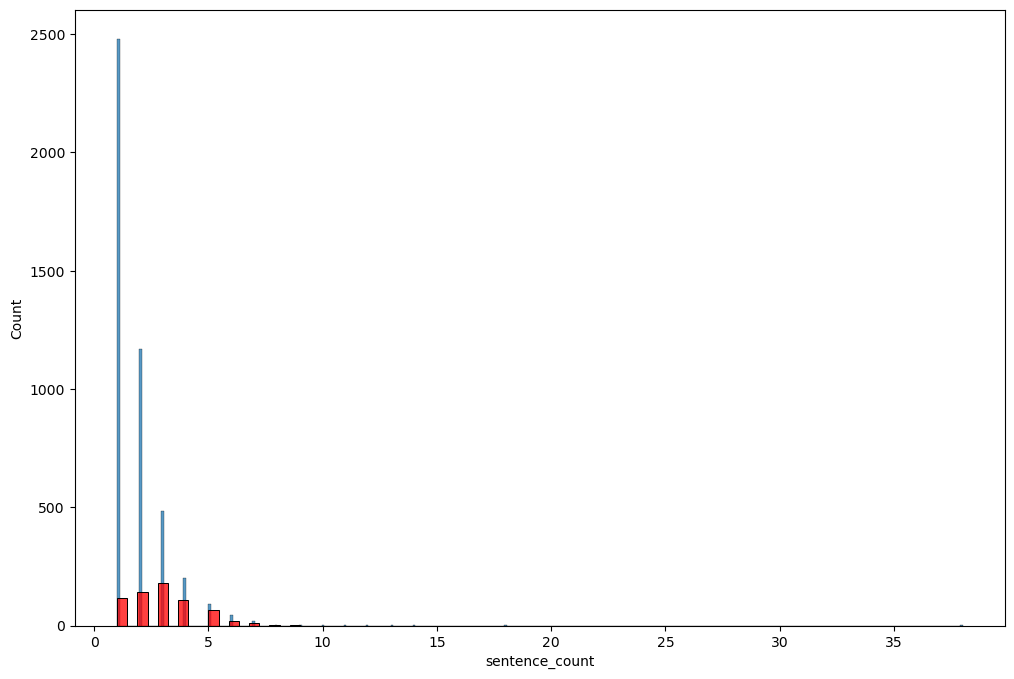

In [89]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['sentence_count'])
sns.histplot(df[df['Target']==1]['sentence_count'],color='red')

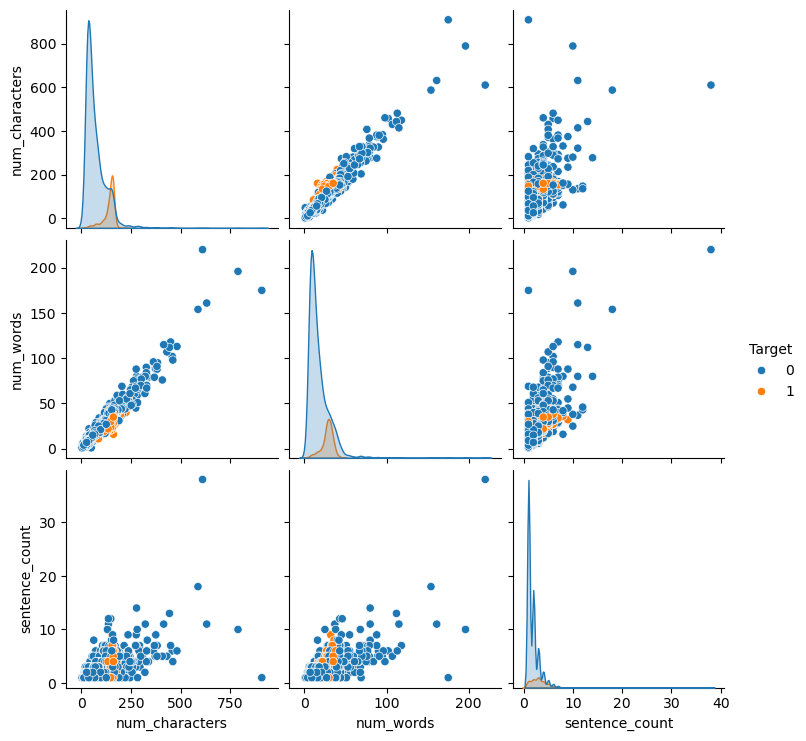

In [91]:
sns.pairplot(df,hue='Target')

In [93]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [94]:
df['transformed_text']=df['Text'].apply(transform_text)

In [95]:
df.head()

,Target,Text,num_characters,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:
from wordcloud import WordCloud

In [102]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [104]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

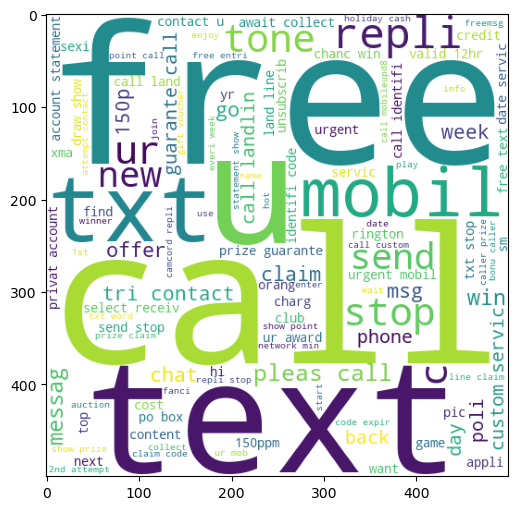

In [106]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [108]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

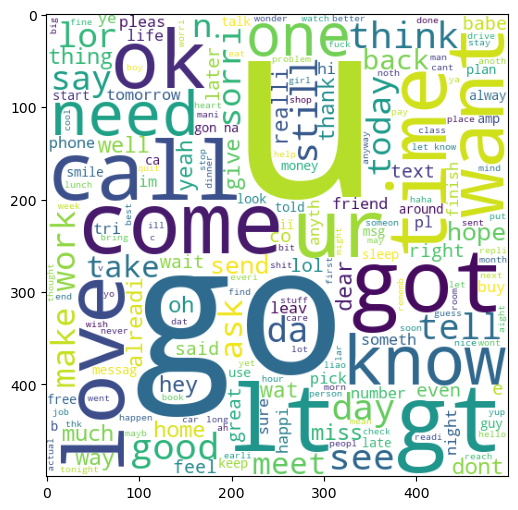

In [109]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [110]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [112]:
len(spam_corpus)

9939

In [188]:
from collections import Counter
x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

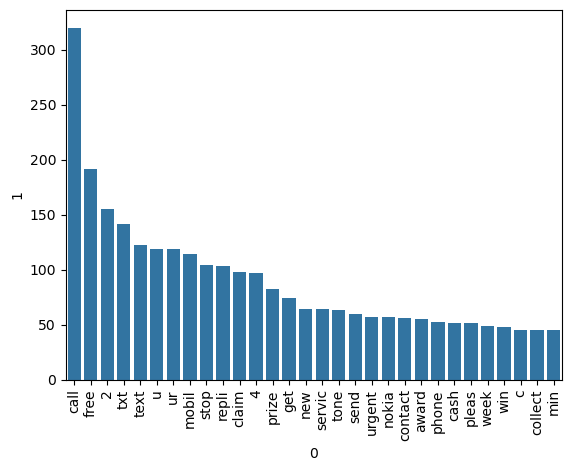

In [190]:
sns.barplot(x=x,y=y)
plt.xticks(rotation='vertical')

plt.show()

In [192]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [194]:
len(ham_corpus)

35404

<Axes: xlabel='0', ylabel='1'>

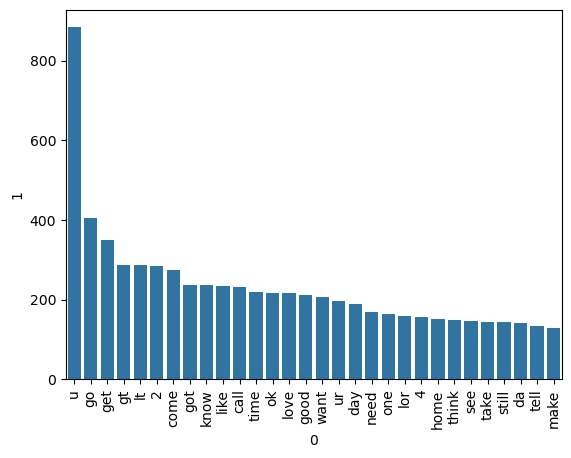

In [199]:
a=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
plt.xticks(rotation='vertical')
sns.barplot(x=a,y=b)

# Model Building

In [366]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [368]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [370]:
X.shape

(5169, 3000)

In [374]:
y=df['Target'].values

In [376]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [378]:
from sklearn.model_selection import train_test_split

In [380]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [382]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [384]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [386]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [388]:
gnb.fit(X_train,y_train)

GaussianNB()

In [389]:
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [392]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [394]:
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [396]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [398]:
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [402]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_mnb.pkl','wb'))